# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**WARNING:** This notebook was automatically generated by AI. It has NOT been fully verified, and users should exercise caution when interpreting any code or outputs. Please review critically before using in your own analysis.

---

## Overview

This notebook helps you explore the DANDI neurophysiology dataset:

- **Title:** Calcium imaging in SMA and M1 of macaques  
- **Dandiset ID:** 001174  
- **Version:** 0.250331.2218  
- **Citation:**  
  Galvan, Adriana; Martel, Anne-Caroline; Pittard, Damien; Devergnas, Annaelle; Risk, Benjamin; Nassi, Jonathan J.; Yu, Waylin; Downer, Joshua D. ; Wichmann, Thomas (2025) Calcium imaging in SMA and M1 of macaques (Version 0.250331.2218) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001174/0.250331.2218

[**View this Dandiset on DANDI Archive**](https://dandiarchive.org/dandiset/001174/0.250331.2218)

**Description:**  
The study examines the activity patterns of projection neurons in the supplementary motor (SMA) and primary motor (M1) areas in four macaques, using in vivo calcium imaging. Animals were recorded both at rest and during an arm-reaching task, providing data on synchronous and sequential neuronal activation.  
_Keywords: One-photon calcium imaging, non-human primates, microendoscope, reaching task, neuronal coactivation, calcium sensors, GCaMP, GRIN lens_

---

## What this notebook covers

- Requirements to interact with this dataset in Python.
- How to access DANDI and browse available files.
- How to load and examine an NWB file from the Dandiset.
- Examples of inspecting file structure and metadata.
- How to extract and visualize calcium imaging data and ROI metadata.
- Links to online exploration tools for convenience.
- Tips for deeper exploration and future steps.

## Required packages

Ensure the following Python packages are installed (_do not re-run pip install here as this notebook assumes they are already available_):

- numpy
- matplotlib
- pandas
- pynwb
- h5py
- remfile
- dandi

(_plus any supporting packages for plots, e.g. seaborn if you'd like enhanced plot styles_)

## 1. Accessing the Dandiset: List Assets with DANDI API

We'll use the official DANDI API to connect and browse the dataset. Here we illustrate how to connect, retrieve metadata, and list available files.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and fetch Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print Dandiset metadata
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some NWB assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)


For this exploration, we will focus on the file:<br>
**`sub-Q/sub-Q_ophys.nwb`**<br>
Asset ID: **`de07db56-e7f3-4809-9972-755c51598e8d`**<br>
<br>
File [direct download link](https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/)<br>
[Explore this NWB on neurosift.app](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft)

## 2. Loading and Exploring an NWB File

The following demonstrates how to load a remote NWB file straight from DANDI using PyNWB, remfile, and h5py. This allows streaming data over the network, so you do not need a local copy. _**Note:** The file is large; always work with small subsets when possible._

In [2]:
import pynwb
import h5py
import remfile

# Construct the remote URL for the NWB file
url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

print("Session description:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Session start:", nwb.session_start_time)
print("Subject:", getattr(nwb.subject, 'subject_id', 'N/A'),
      getattr(nwb.subject, 'species', 'N/A'), 
      getattr(nwb.subject, 'sex', 'N/A'))

Session description: Calcium imaging in SMA during the spontaneous condition
Identifier: 5c2c4bb2-8310-4e0e-ae01-fd872edba928
Session start: 2022-09-15 13:16:33.129000+00:00
Subject: Q Macaca mulatta F


### Overview of NWB File Structure

Key objects and their relationships (summarized from metadata):

```
NWBFile
├── acquisition["OnePhotonSeries"]: Miniscope imaging video (images x height x width)
├── processing["ophys"]: Optical physiology data
│   ├── data_interfaces["EventAmplitude"]: ROI event amplitudes (frames x ROIs)
│   ├── data_interfaces["Fluorescence"]: ROI mean fluorescence (frames x ROIs)
│   ├── data_interfaces["ImageSegmentation"]: ROI segmentation
│       └── plane_segmentations["PlaneSegmentation"]: Cell mask table
└── subject: Metadata about animal ('Q', Macaca mulatta)
```

- **OnePhotonSeries:** Contains the movie as a 3D array (frames × y × x, shape (6041, 320, 200)).
- **EventAmplitude / Fluorescence:** 2D arrays (frames × ROIs, shape (6041, 40)), event and mean signals.
- **PlaneSegmentation:** Table describing each ROI (cell mask).

You can view more about each section with `.description` and similar attributes.

### Exploring Metadata and Experiment Info

In [3]:
print("Imaging plane description:")
print(nwb.acquisition['OnePhotonSeries'].imaging_plane.description)
print("Imaging rate:", nwb.acquisition['OnePhotonSeries'].imaging_plane.imaging_rate)
print("Device:", nwb.acquisition['OnePhotonSeries'].imaging_plane.device.description)

Imaging plane description:
The plane being imaged by the miniscope
Imaging rate: 10.01
Device: NVista3


### Listing ROIs (Cells) and Their Masks

The segmented ROIs (cells) are stored in a "PlaneSegmentation" table. Let's print some ROI IDs and show the mask shape.

In [4]:
plane_seg = nwb.processing['ophys'].data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
roi_table = plane_seg.to_dataframe()
print("ROI Table columns:", roi_table.columns.tolist())
print("First 5 ROI indices:", roi_table.index.tolist()[:5])

# Show the shape of one image mask:
mask0 = roi_table['image_mask'].iloc[0]
print("Shape of image_mask for ROI 0:", mask0.shape)
print("Mask values range: [{:.2f}, {:.2f}]".format(mask0.min(), mask0.max()))

ROI Table columns: ['image_mask']
First 5 ROI indices: [0, 1, 2, 3, 4]
Shape of image_mask for ROI 0: (292, 179)
Mask values range: [0.00, 1.00]


## 3. Loading and Visualizing Example Data

We'll now visualize a single frame of the raw imaging movie using matplotlib.
We select frame 0 as an example.

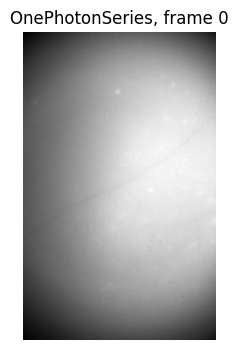

In [5]:
import matplotlib.pyplot as plt

frame0 = nwb.acquisition['OnePhotonSeries'].data[0, :, :]
plt.figure(figsize=(6, 4))
plt.imshow(frame0, cmap='gray')
plt.title('OnePhotonSeries, frame 0')
plt.axis('off')
plt.show()

### Plotting Fluorescence Signals for Several ROIs

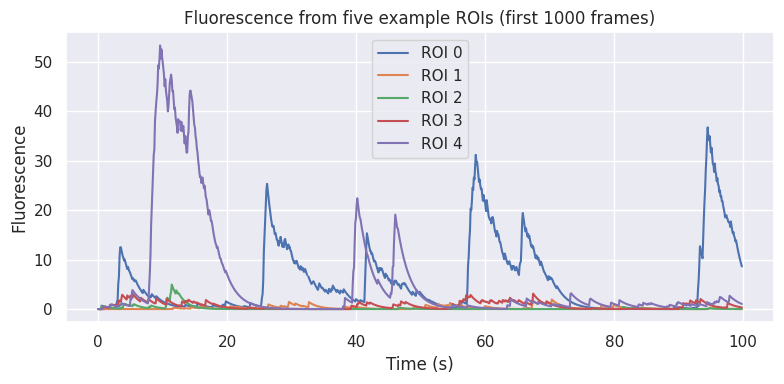

In [6]:
import numpy as np
import seaborn as sns
sns.set_theme()

fluor = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['RoiResponseSeries']
fluor_data = fluor.data[:1000, :5]   # [first 1000 frames, ROIs 0-4]
time = np.arange(0, fluor_data.shape[0]) / fluor.rate

plt.figure(figsize=(8, 4))
for i in range(fluor_data.shape[1]):
    plt.plot(time, fluor_data[:, i], label=f'ROI {i}')
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence')
plt.title('Fluorescence from five example ROIs (first 1000 frames)')
plt.legend()
plt.tight_layout()
plt.show()

### Visualizing ROI Masks as a Heatmap

We can visualize the spatial arrangement of all ROI (cell) masks by forming an aggregate mask. Here, we use the maximum mask value at each pixel across ROIs.

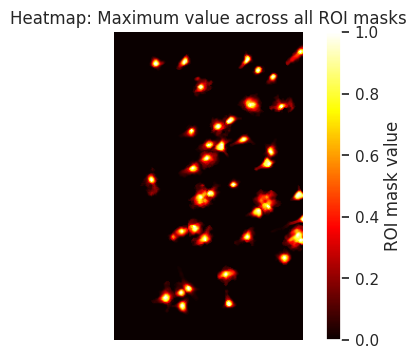

In [7]:
roi_masks = np.stack([im for im in roi_table['image_mask']], axis=0)  # shape: (num_rois, y, x)
agg_mask = np.max(roi_masks, axis=0)
plt.figure(figsize=(6, 4))
plt.imshow(agg_mask, origin='upper', cmap='hot')
plt.title('Heatmap: Maximum value across all ROI masks')
plt.axis('off')
plt.colorbar(label='ROI mask value')
plt.show()

### Inspecting Event Amplitude Data

We can plot sample event amplitudes (which reflect neural events) for a few ROIs.

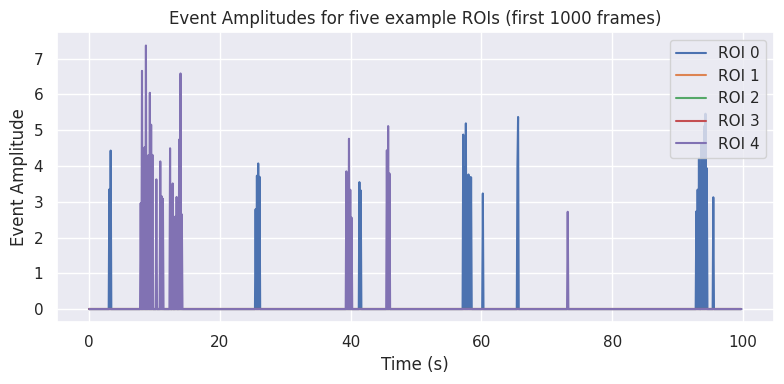

In [8]:
ea = nwb.processing['ophys'].data_interfaces['EventAmplitude']
ea_data = ea.data[:1000, :5]   # [first 1000 frames, ROIs 0-4]
ea_time = np.arange(0, ea_data.shape[0]) / ea.rate

plt.figure(figsize=(8, 4))
for i in range(ea_data.shape[1]):
    plt.plot(ea_time, ea_data[:, i], label=f'ROI {i}')
plt.xlabel('Time (s)')
plt.ylabel('Event Amplitude')
plt.title('Event Amplitudes for five example ROIs (first 1000 frames)')
plt.legend()
plt.tight_layout()
plt.show()

## 4. Summary and Future Directions

In this notebook, you learned how to:

- Connect to the DANDI Archive and browse available files
- Load a remote NWB file and access rich metadata
- Inspect and visualize imaging, segmentation, fluorescence, and neural event data
- View and interpret cell masks and sample traces

---

**Possible next steps for deeper exploration:**

- Compare ROIs/cell signals between rest and behavior conditions (if labeled)
- Analyze synchronous or sequential activation across ROIs
- Cluster ROI temporal patterns using unsupervised approaches
- Quantify basic/supplementary ROI statistics over sessions, animals, or areas
- Combine with behavioral annotations if available

See full experiment provenance and data access at [DANDI 001174 version 0.250331.2218](https://dandiarchive.org/dandiset/001174/0.250331.2218)
and try visualizing this NWB file interactively at [neurosift.app](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft).

_Always critically review AI-generated code/results and consult data documentation for precise interpretation._